# Ghanem MAGROUNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

# Datasets


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


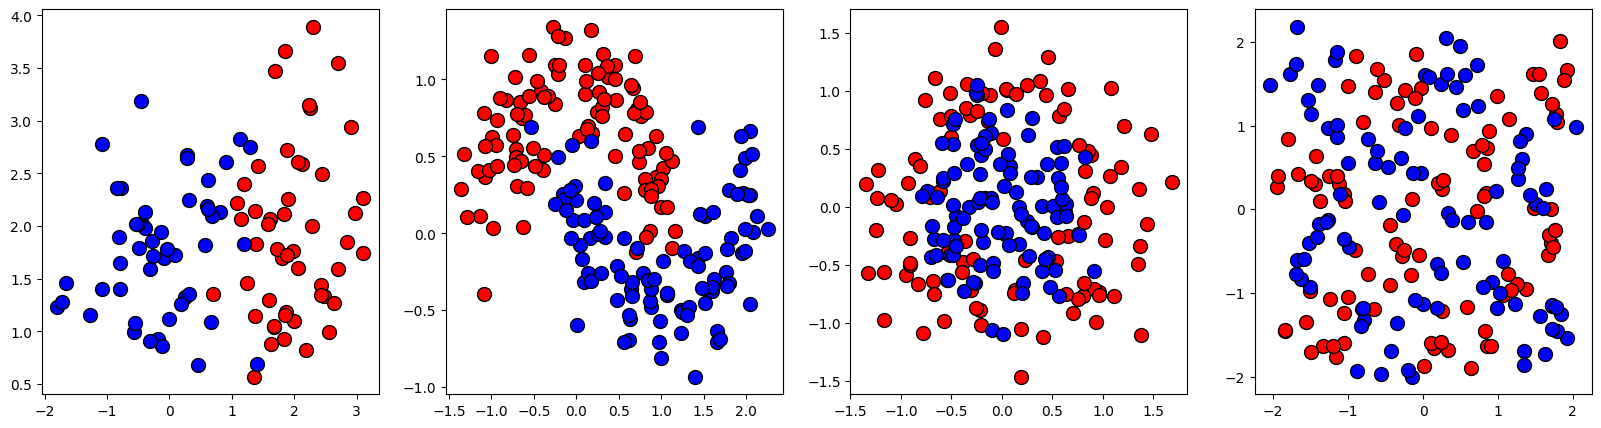

In [2]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [3]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

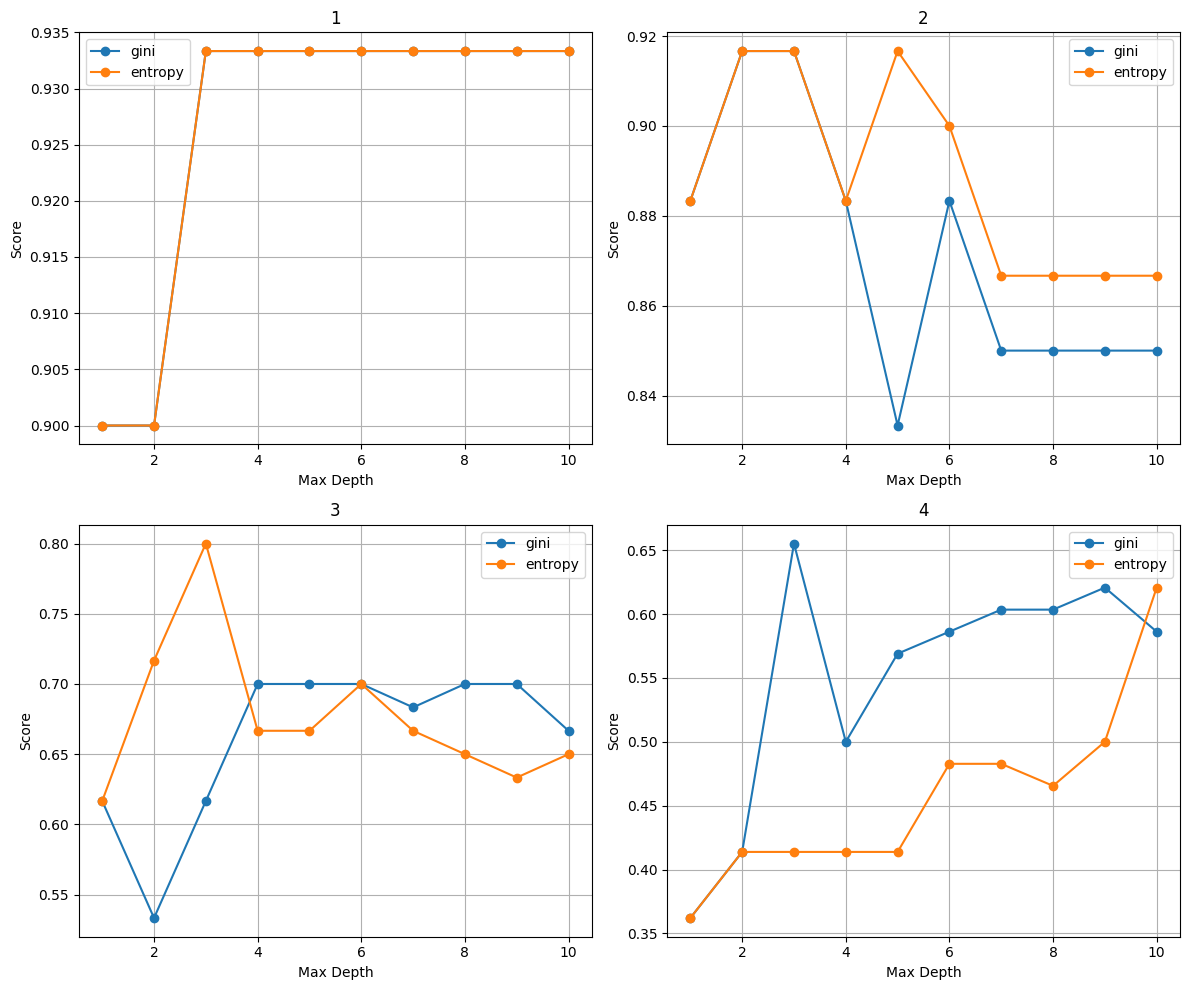

In [4]:
#Question 1 

criteres = ['gini', 'entropy']
max_depths = range(1, 11)
titles = ["1", "2", "3", "4"]

fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs = axs.ravel()

for i, dataset in enumerate(datasets):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for crit in criteres:
        scores = []
        for depth in max_depths:
            clf = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))
        axs[i].plot(max_depths, scores, marker='o', label=crit)
    
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Max Depth")
    axs[i].set_ylabel("Score")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Critère 'gini' : meilleur max_depth = 3 avec un score de 0.933 pour le modèle '1'
Critère 'entropy' : meilleur max_depth = 3 avec un score de 0.933 pour le modèle '1'
Critère 'gini' : meilleur max_depth = 2 avec un score de 0.917 pour le modèle '2'
Critère 'entropy' : meilleur max_depth = 2 avec un score de 0.917 pour le modèle '2'
Critère 'gini' : meilleur max_depth = 4 avec un score de 0.700 pour le modèle '3'
Critère 'entropy' : meilleur max_depth = 3 avec un score de 0.800 pour le modèle '3'
Critère 'gini' : meilleur max_depth = 3 avec un score de 0.655 pour le modèle '4'
Critère 'entropy' : meilleur max_depth = 10 avec un score de 0.621 pour le modèle '4'

Frontière de décision pour le critère 'gini' (max_depth = 3) pour le modèle '1' :


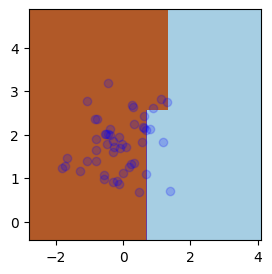


Frontière de décision pour le critère 'entropy' (max_depth = 3) pour le modèle '1' :


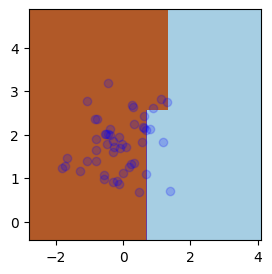


Frontière de décision pour le critère 'gini' (max_depth = 2) pour le modèle '2' :


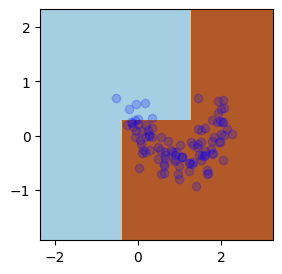


Frontière de décision pour le critère 'entropy' (max_depth = 2) pour le modèle '2' :


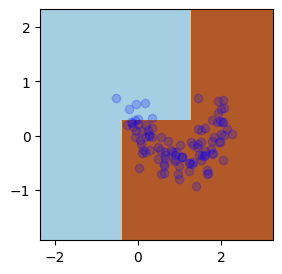


Frontière de décision pour le critère 'gini' (max_depth = 4) pour le modèle '3' :


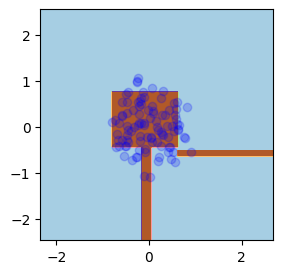


Frontière de décision pour le critère 'entropy' (max_depth = 3) pour le modèle '3' :


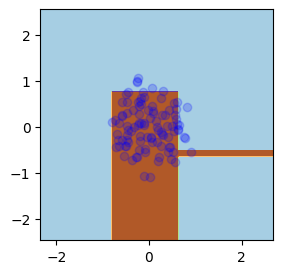


Frontière de décision pour le critère 'gini' (max_depth = 3) pour le modèle '4' :


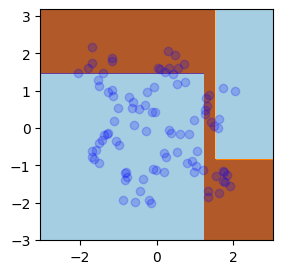


Frontière de décision pour le critère 'entropy' (max_depth = 10) pour le modèle '4' :


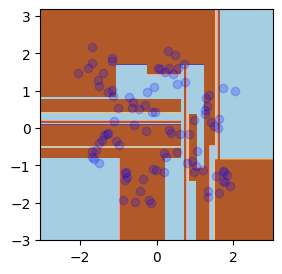

In [5]:
#Question 2  


best_clfs = {}    
best_depths = {} 
best_crits = {} 


for i, dataset in enumerate(datasets):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    best_clfs[i] = {}
    best_depths[i] = {}
    best_crits[i] = {}
    
    for crit in criteres:
        best_score = -np.inf
        best_depth = None
        best_clf = None
        for depth in max_depths:
            clf = DecisionTreeClassifier(criterion=crit, max_depth=depth, random_state=42)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            if score > best_score:
                best_score = score
                best_depth = depth
                best_clf = clf
                best_crit = crit
        best_depths[i][crit] = best_depth
        best_clfs[i][crit] = best_clf
        best_crits[i][crit]= best_crit

        print(f"Critère '{crit}' : meilleur max_depth = {best_depth} avec un score de {best_score:.3f} pour le modèle '{titles[i]}'")

for i, dataset in enumerate(datasets):
    X, y = dataset
    for crit in criteres:
        print(f"\nFrontière de décision pour le critère '{crit}' (max_depth = {best_depths[i][crit]}) pour le modèle '{titles[i]}' :")
        plot_tree(best_clfs[i][crit], X, y)


Le meilleur arbre pour le dataset '2' utilise le critère 'entropy' avec max_depth = 2 et un score de 0.621
Random Forest sur le dataset 'blobs' obtient un score de 0.950

Frontière de décision pour le critère 'entropy' (max_depth = 2) pour le modèle '2' :


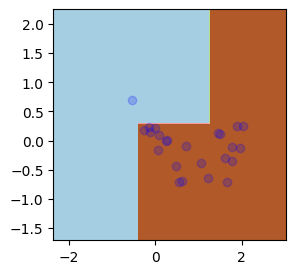


Frontière de décision pour Random Forest pour le modèle '2' :


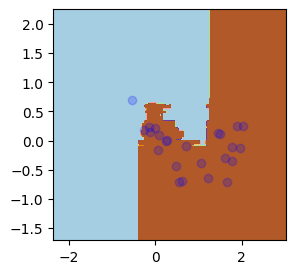

In [6]:
#Question 3

from sklearn.ensemble import RandomForestClassifier

X, y = datasets[1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

criteres = ['gini', 'entropy']
max_depths = range(1, 11)



print(f"Le meilleur arbre pour le dataset '2' utilise le critère '{best_crits[1][crit]}' avec max_depth = {best_depths[1][crit]} et un score de {best_score:.3f}")

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print(f"Random Forest sur le dataset 'blobs' obtient un score de {rf_score:.3f}")



print(f"\nFrontière de décision pour le critère '{best_crits[1][crit]}' (max_depth = {best_depths[1][crit]}) pour le modèle '2' :")
plot_tree(best_clfs[1][crit], X_test, y_test)
print(f"\nFrontière de décision pour Random Forest pour le modèle '2' :")
plot_tree(rf, X_test, y_test)


Le Random forest semble plus précis 

# Ensembles
## Exercise 4, random forest

In [46]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
scores_diabetes = cross_val_score(rf_regressor, X_diabetes, y_diabetes, cv=5, scoring='r2')
print("Diabetes - Score R² moyen : {:.3f}".format(np.mean(scores_diabetes)))


# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
rf_classifier_iris = RandomForestClassifier(n_estimators=100, random_state=0)
scores_iris = cross_val_score(rf_classifier_iris, X_iris, y_iris, cv=5, scoring='accuracy')
print("Iris - Accuracy moyenne : {:.3f}".format(np.mean(scores_iris)))



# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
rf_classifier_digits = RandomForestClassifier(n_estimators=100, random_state=0)
scores_digits = cross_val_score(rf_classifier_digits, X_digits, y_digits, cv=5, scoring='accuracy')
print("Digits - Accuracy moyenne : {:.3f}".format(np.mean(scores_digits)))




Diabetes - Score R² moyen : 0.424
Iris - Accuracy moyenne : 0.953
Digits - Accuracy moyenne : 0.974


## Exercise 5, feature importance

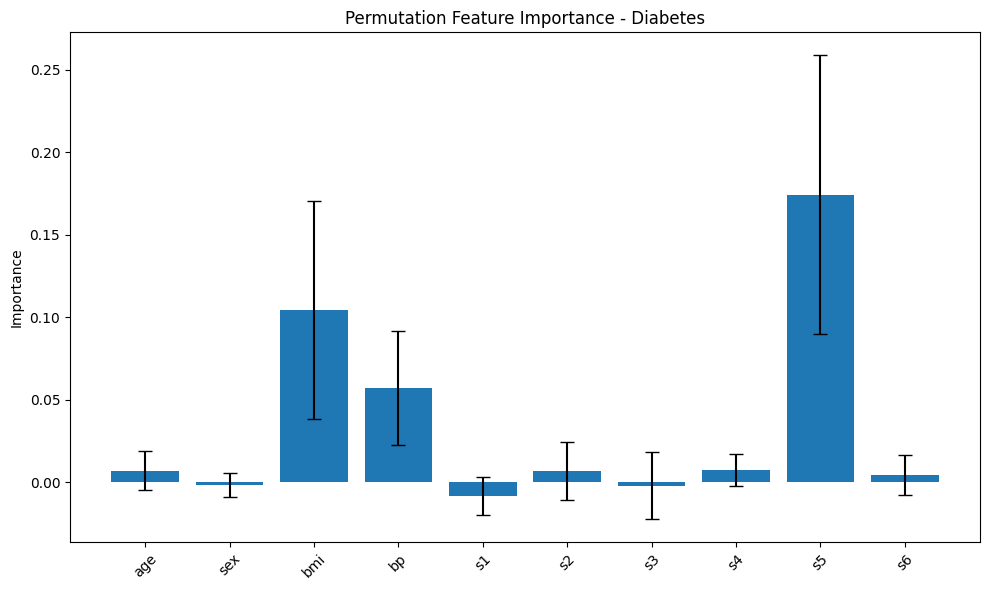

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Compute the feature importance and plot the results
result = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=0, scoring='r2')
importances_mean = result.importances_mean
importances_std = result.importances_std

feature_names = diabetes.feature_names

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances_mean)), importances_mean, yerr=importances_std, align='center', capsize=5)
plt.xticks(range(len(importances_mean)), feature_names, rotation=45)
plt.ylabel("Importance")
plt.title("Permutation Feature Importance - Diabetes")
plt.tight_layout()
plt.show()


Grace à cela on peut choisir les données les plus importante qui contribussent le plus pour un prochaine entrainement

# Regression
## Exercise 6

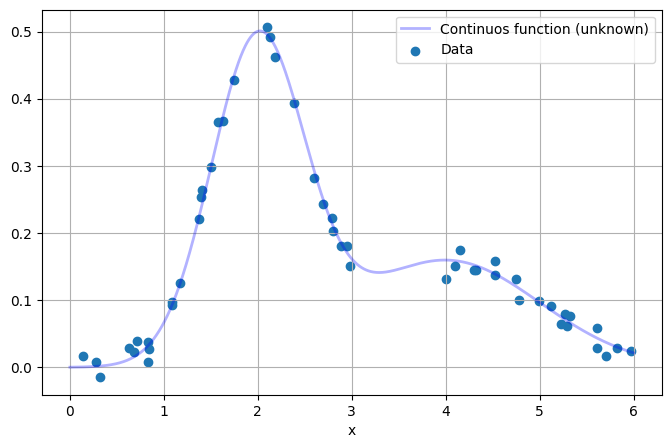

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

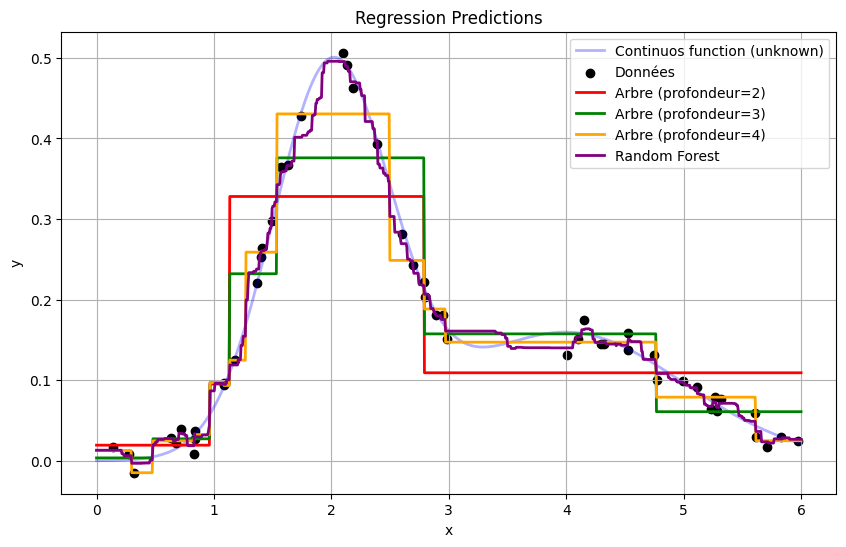

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Xr = Xr.reshape(-1, 1)
x = x.reshape(-1, 1)


depths = [2, 3, 4]
predictions_trees = {}
for d in depths:
    dt = DecisionTreeRegressor(max_depth=d, random_state=0)
    dt.fit(Xr, yr)
    predictions_trees[d] = dt.predict(x)

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(Xr, yr)
predictions_rf = rf.predict(x)


plt.figure(figsize=(10, 6))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=0.3, color="blue", lw=2)


plt.scatter(Xr, yr, label="Données", color="black")


colors = ['red', 'green', 'orange']
for i, d in enumerate(depths):
    plt.plot(x, predictions_trees[d], label=f"Arbre (profondeur={d})", color=colors[i], lw=2)


plt.plot(x, predictions_rf, label="Random Forest", color='purple', lw=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()


Arbre de regression : Les prédictions sont des fonctions par morceaux constantes.
Pour une profondeur faible? l'arbre segmente l'espace en quelques grandes régions, ce qui donne une approximation très grossière de la fonction réelle. En augmentant la profondeur, l'arbre découpe l'espace en régions plus petites et s'ajuste davantage aux données, mais reste par nature une fonction « en escalier ».

Random Forest : On a une fonction plus lisse, qui tend à mieux capturer la variation dedes données, tout en conservant la robustesse aux bruits.

Critère d’impureté utilisé :
entropy

# AdaBoost + stump (bonus question)
## Exercise 7 (+13)

In [48]:
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_bellow_threshold = None
    self.class_above_threshold = None
    self.best_ev = None
  def get_threshold(self): 
      return self.best_threshold
  def get_best(self): 
      return self.best_dimension,  self.best_threshold, self.best_ev
    
  def fit(self,X,y, sample_weight=None): 
    if sample_weight is None: sample_weight = np.ones(len(X))
    best_ev = None
    region = [X.min(axis=0), X.max(axis=0)]
    for dimension in [0,1]:
      # we evaluate all the possible partitions incrementally
      # at the beggining we assume that all datapoints are in the 'right' partition
      # at the end, they will all in be the 'left' partition
      
      ######################
      ### Your code here ### 
      ######################


  def predict(self,X) :
    res = []
    for x in X[:,self.best_dimension]:
      if x < self.best_threshold :
      ######################
      ### Your code here ### 
      ######################
    return np.array(res)


  
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1 # For AdaBoost y={-1,+1} but the rest can be y={0,1} 

my_stump = My_stump()
my_stump.fit(X, y, w)
plot_tree(my_stump,X,y)

# Sanity check: my_stump should be the same as the decisionTree of depth=1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
plot_tree(clf,X,y)

IndentationError: expected an indented block after 'for' statement on line 20 (882891151.py, line 30)

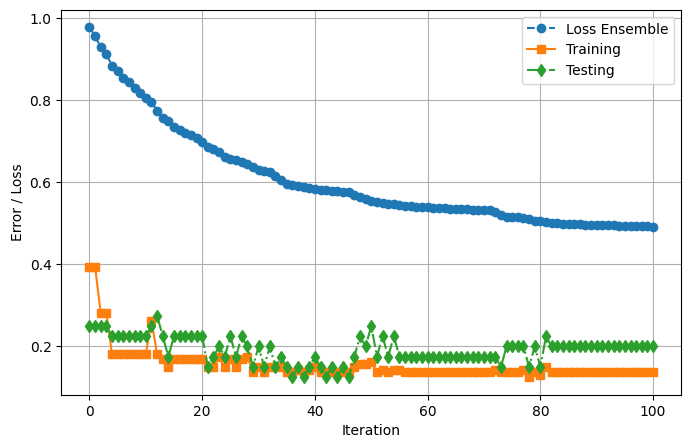

In [ ]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
def compute_error(y, y_pred, w_m):
   return np.sum(w_m * (y != y_pred))/ np.sum(w_m)
  


def compute_alpha(error):
    if error == 0:
        error = 1e-10
    return 0.5 * np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):

    new_w = w_i * np.exp(-alpha * y * y_pred)
    return new_w / np.sum(new_w)
  
class AdaBoost:
    
    def __init__(self):
        self.alphas = [] # list of coefficients for the classifiers
        self.G_M = [] # list of wesk clssifier
        self.M = None # number of iterations
        # we save the error for plotting the evoltion of the performance
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []
    
    def predict(self, X):
        agg = np.zeros(X.shape[0])
        for alpha, learner in zip(self.alphas, self.G_M):
            agg += alpha * learner.predict(X)
        return np.sign(agg)

    def fit(self, X, y, M=50, X_test=None, y_test=None):
        self.alphas = [] 
        self.G_M = []
        self.training_errors, self.testing_errors = [], []
        self.loss_ensemble = []
        self.M = M
        
        n_samples = len(y)
        w_m = np.ones(n_samples) / n_samples
        # Iterate over M weak classifiers
        for m in range(0, M):

            # Now, we can use our stumps...
            G_m = DecisionTreeClassifier(max_depth = 1) # Stump from sklearn
            G_m.fit(X, y, sample_weight=w_m)
            
            y_pred = G_m.predict(X)
            
            error_m = compute_error(y, y_pred, w_m)
            alpha_m = compute_alpha(error_m)
            
           
            w_m = update_weights(w_m, alpha_m, y, y_pred)

            self.G_M.append(G_m)
            self.alphas.append(alpha_m)
            
            y_pred_train = self.predict(X)
            train_err = np.mean(y_pred_train != y)
            self.training_errors.append(train_err)
            
            if (X_test is not None) and (y_test is not None):
                y_pred_test = self.predict(X_test)
                test_err = np.mean(y_pred_test != y_test)
            else:
                test_err = 0.0
            self.testing_errors.append(test_err)
            
            F_x = 0.0
            for aa, gg in zip(self.alphas, self.G_M):
                F_x += aa * gg.predict(X)
            loss_exp = np.mean(np.exp(-y * F_x))
            self.loss_ensemble.append(loss_exp)
    
           
        
        

dataset = datasets[2]
X = dataset[0]
y = dataset[1]*2-1 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ab = AdaBoost()
ab.fit(X_train, y_train, M = 101, X_test=X_test, y_test=y_test)
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.legend()
plt.grid(True)
plt.show()

Run the code for 50 iterations for all the toy datasets. At each iteration, plot the result of the
AdaBoost ensemble ab using plot_tree(ab, X, y).


DataSet 1


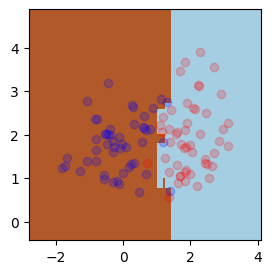

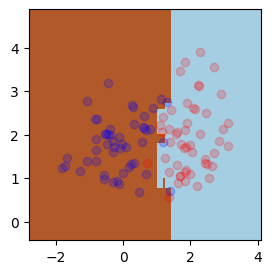

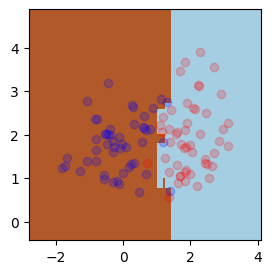

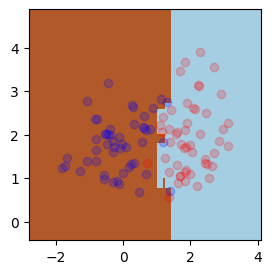

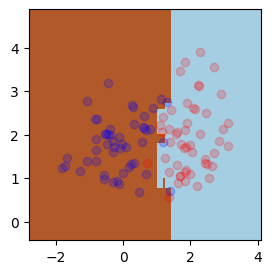

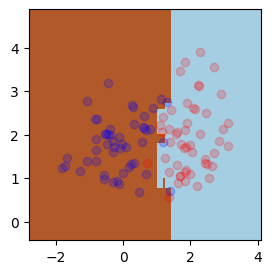

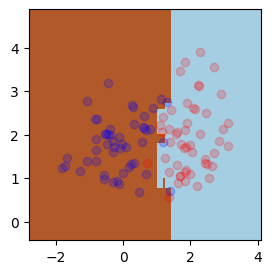

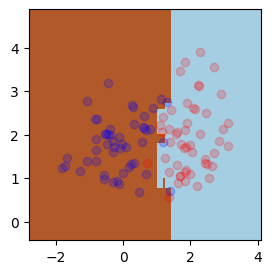

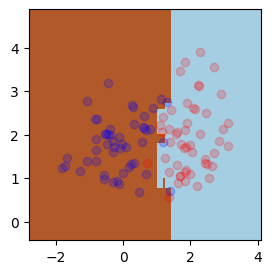

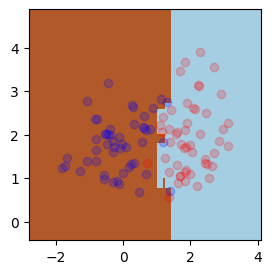

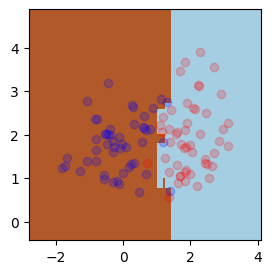

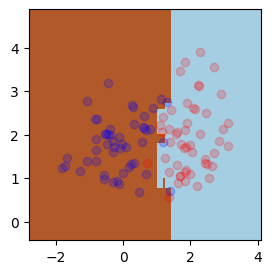

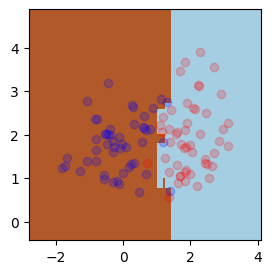

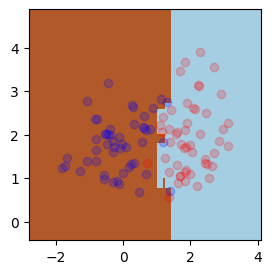

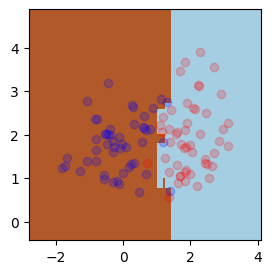

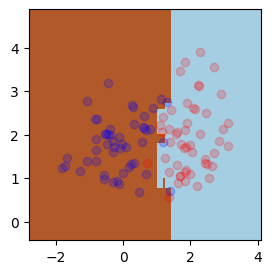

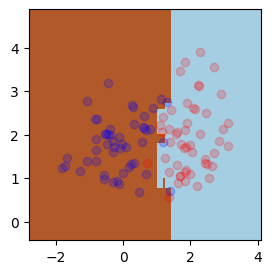

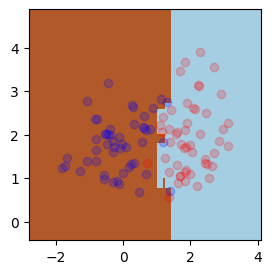

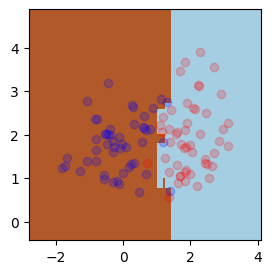

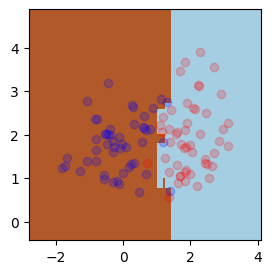

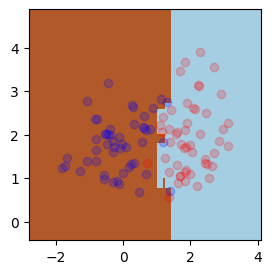

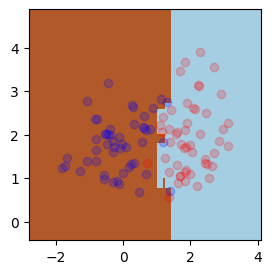

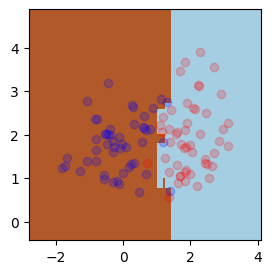

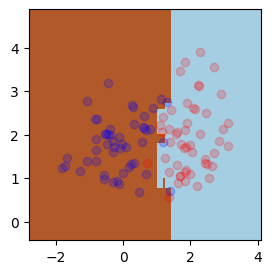

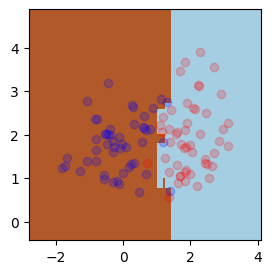

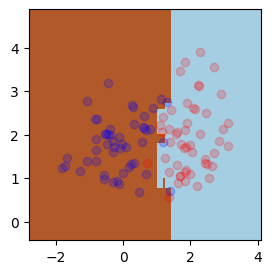

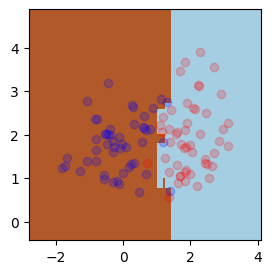

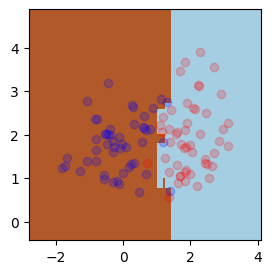

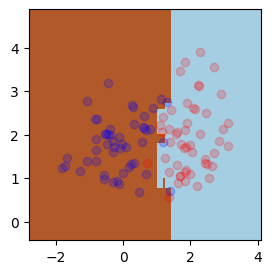

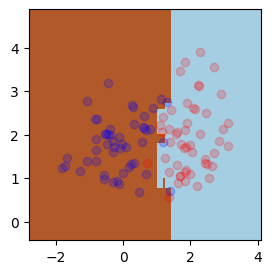

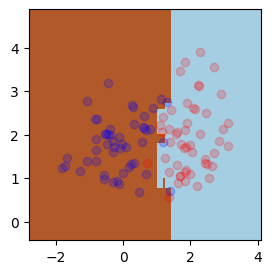

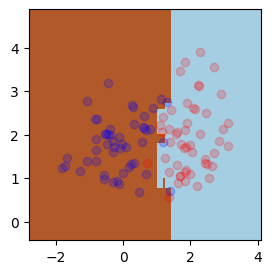

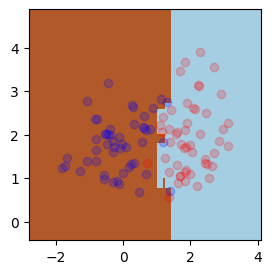

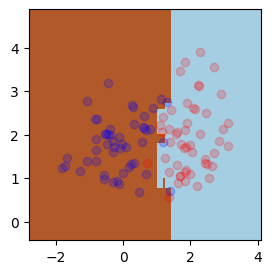

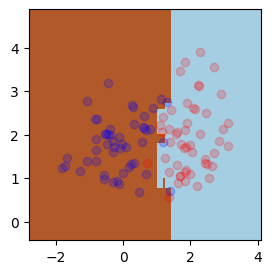

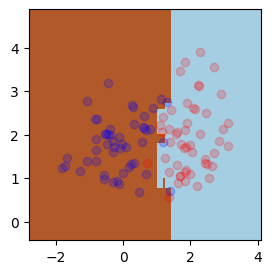

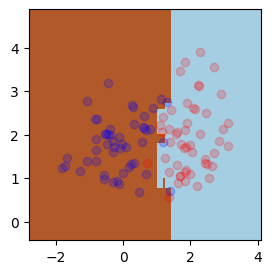

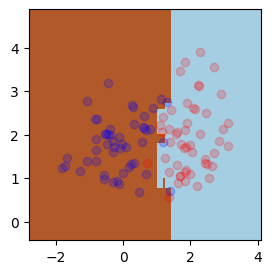

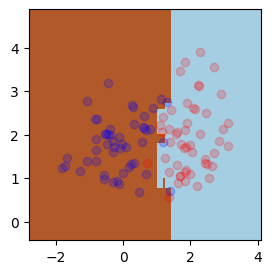

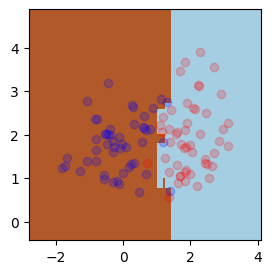

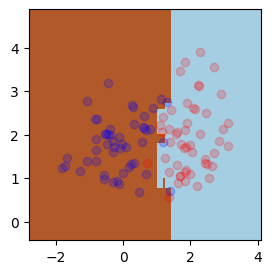

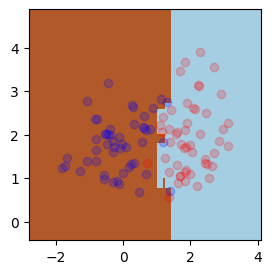

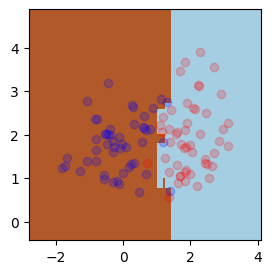

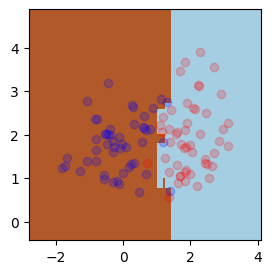

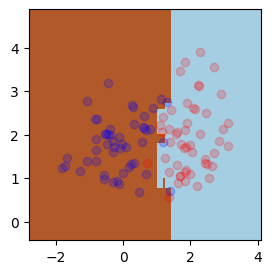

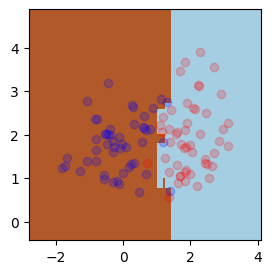

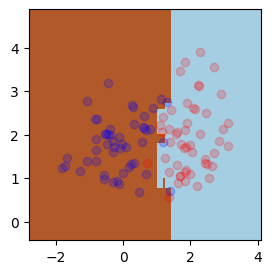

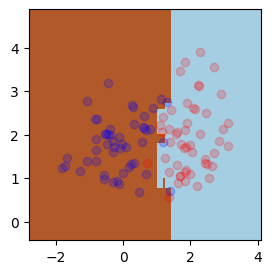

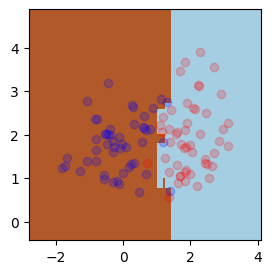

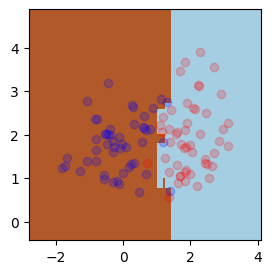

DataSet 50


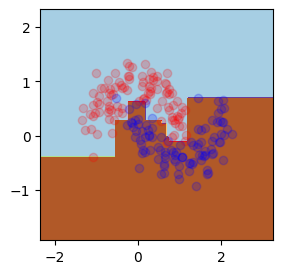

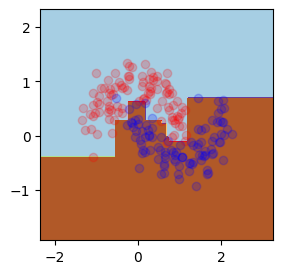

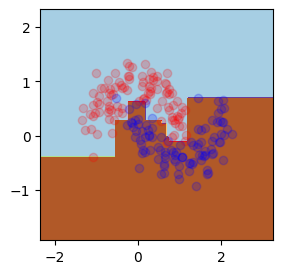

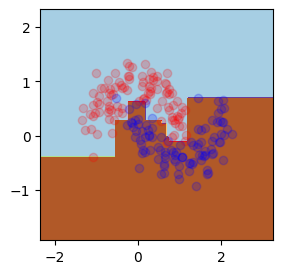

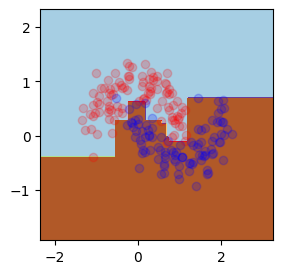

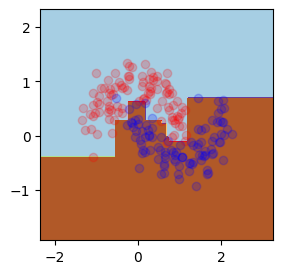

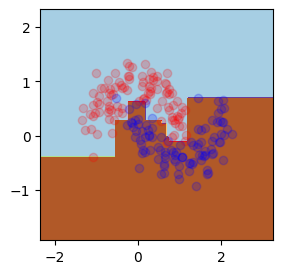

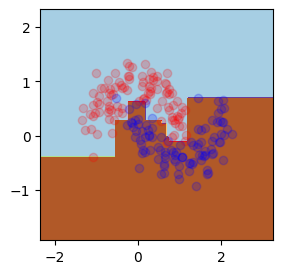

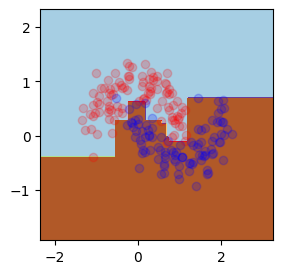

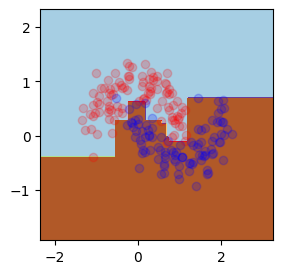

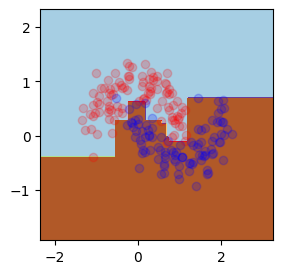

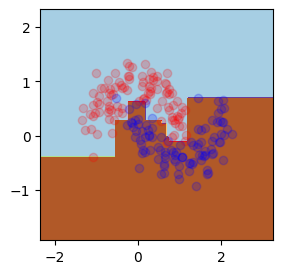

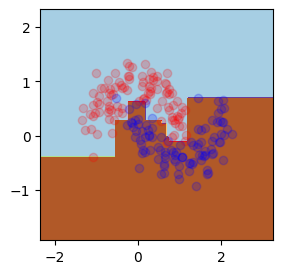

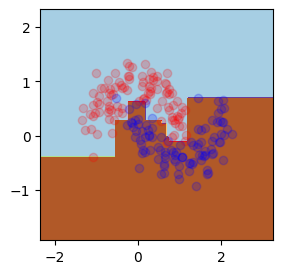

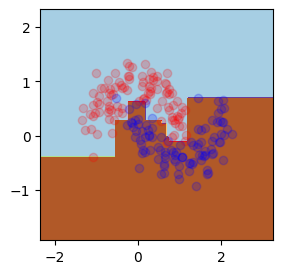

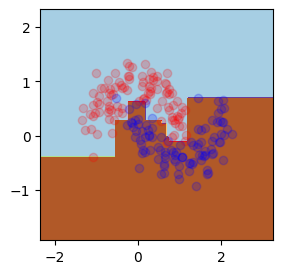

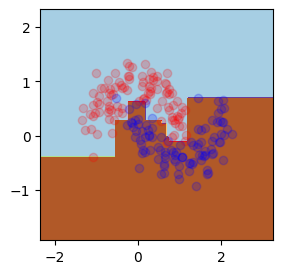

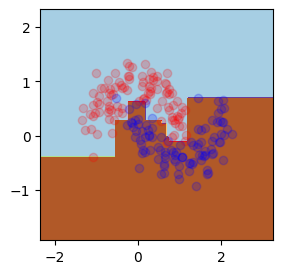

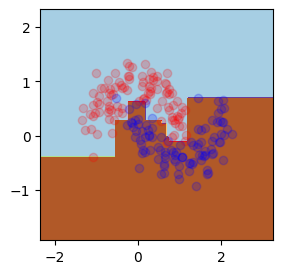

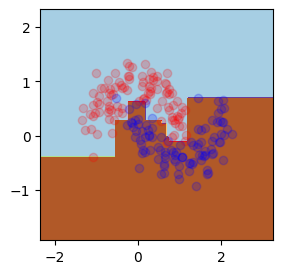

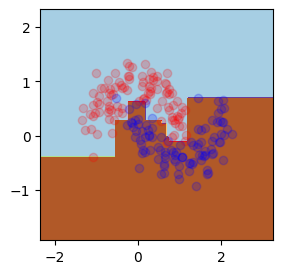

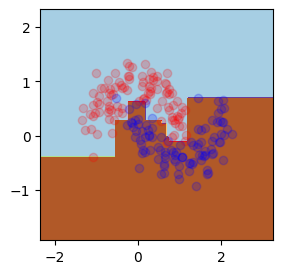

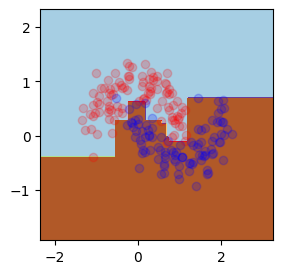

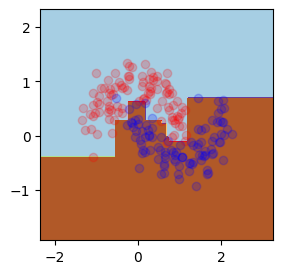

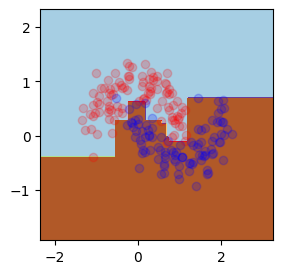

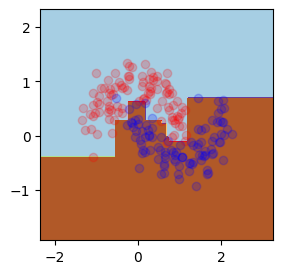

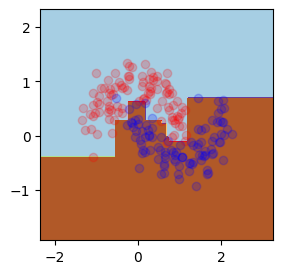

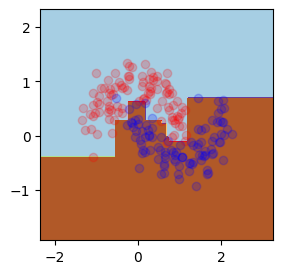

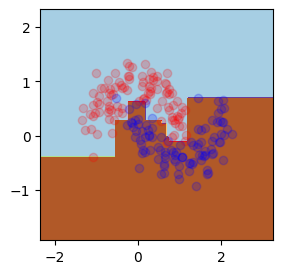

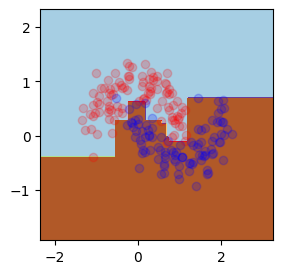

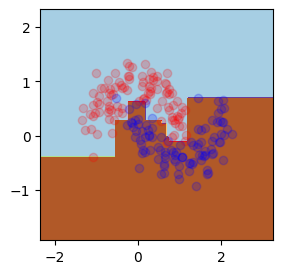

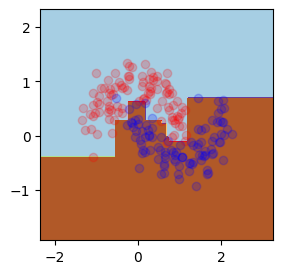

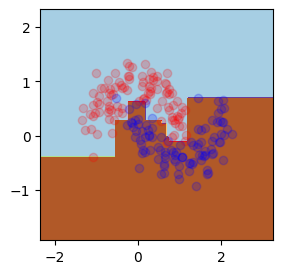

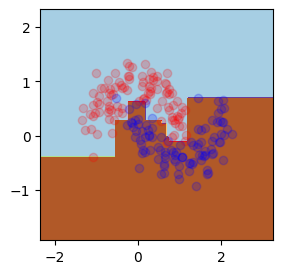

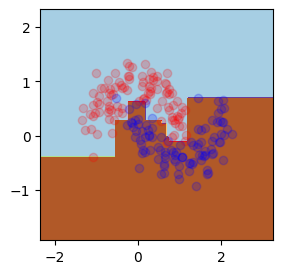

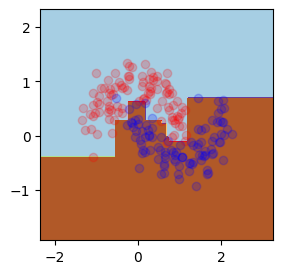

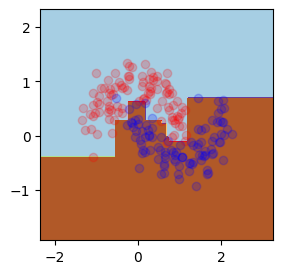

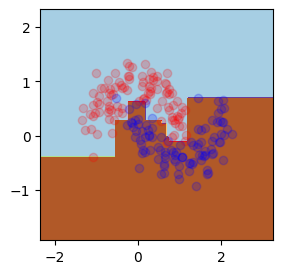

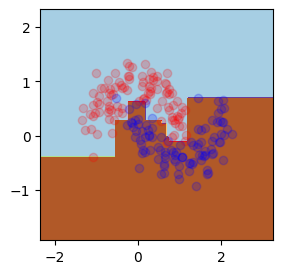

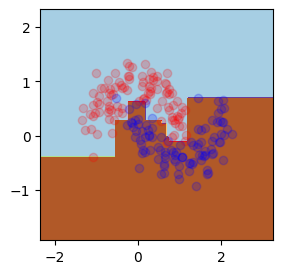

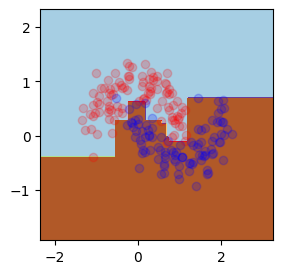

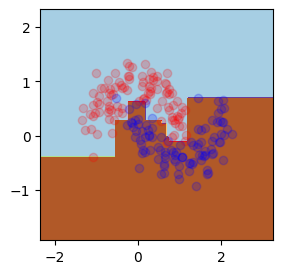

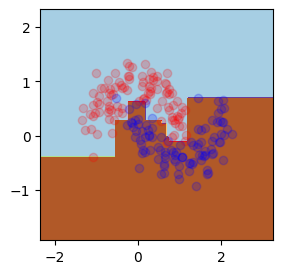

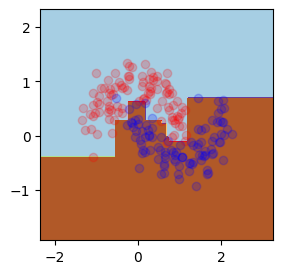

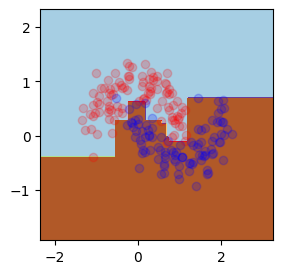

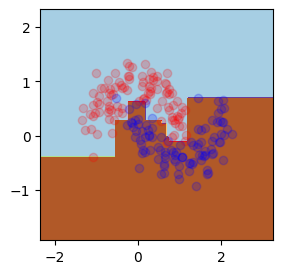

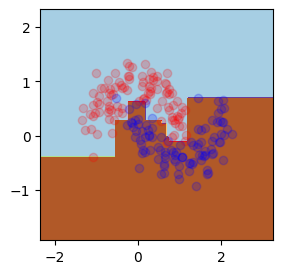

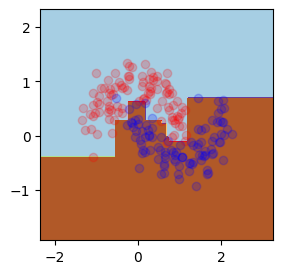

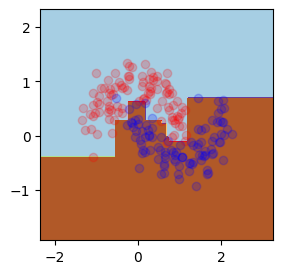

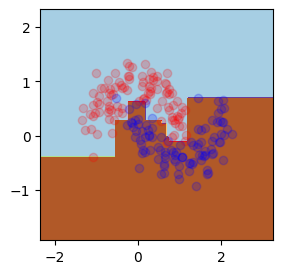

DataSet 50


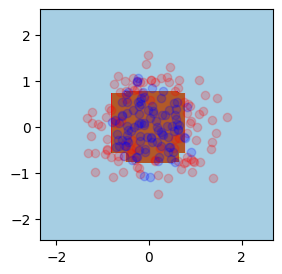

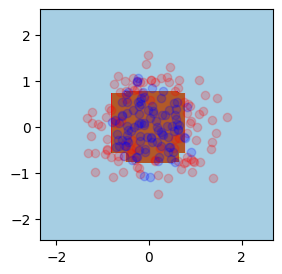

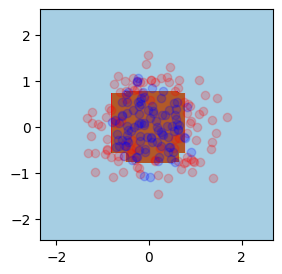

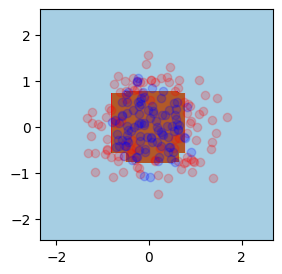

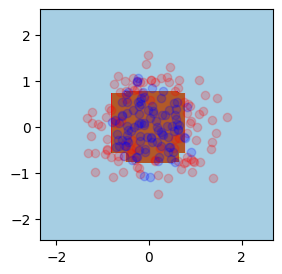

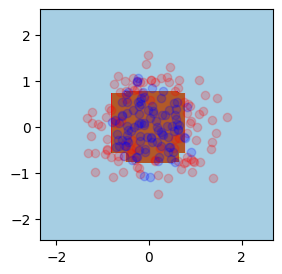

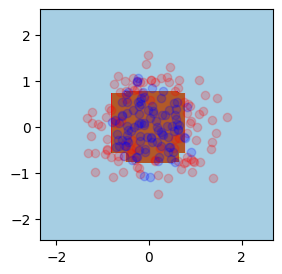

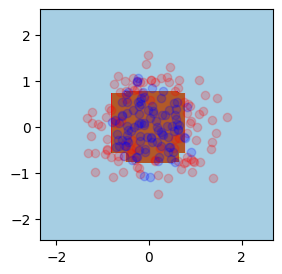

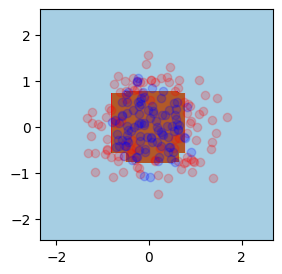

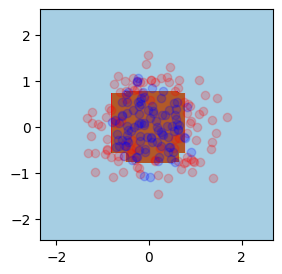

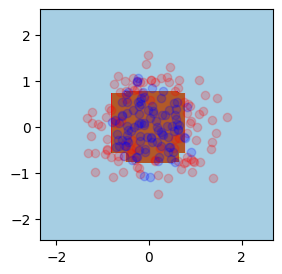

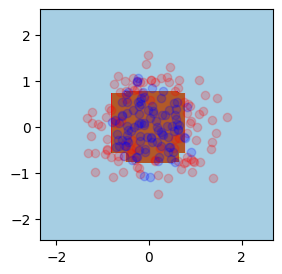

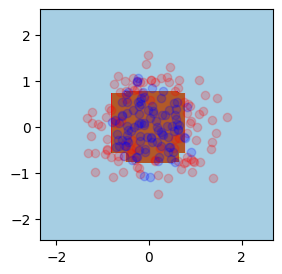

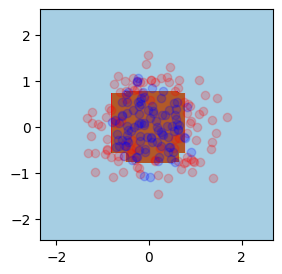

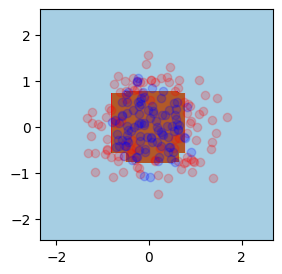

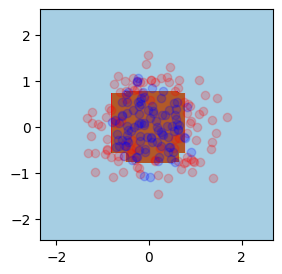

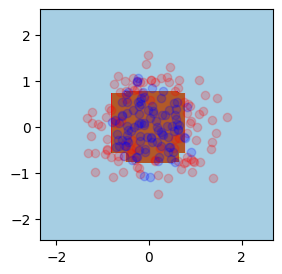

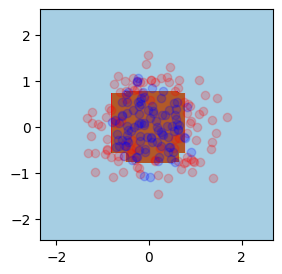

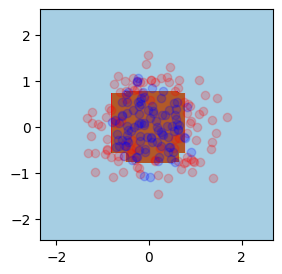

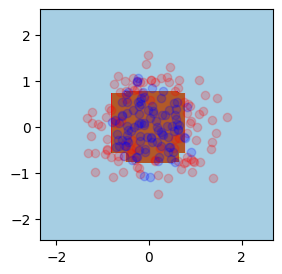

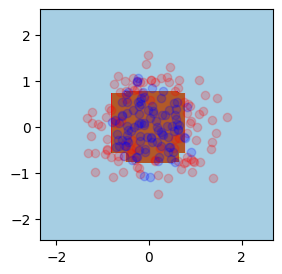

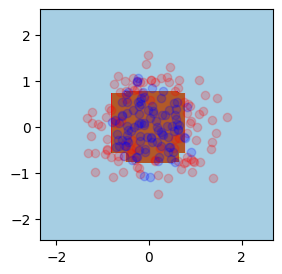

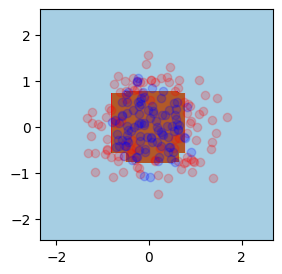

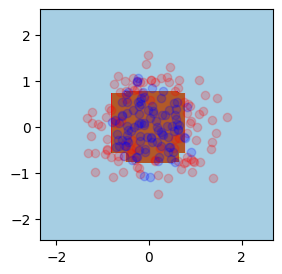

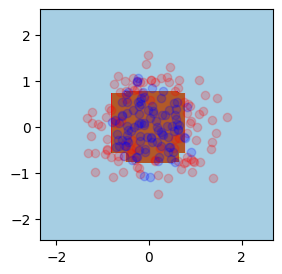

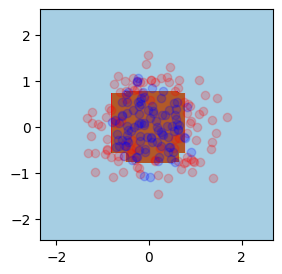

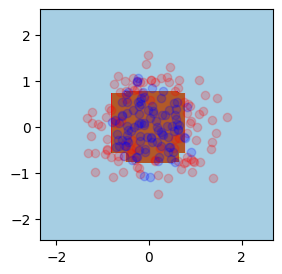

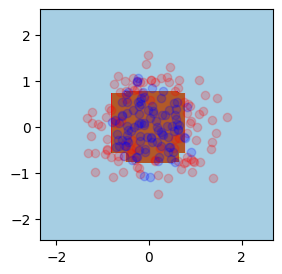

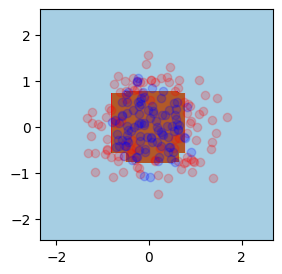

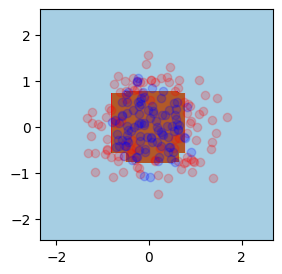

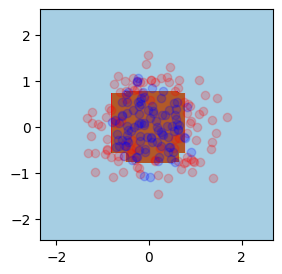

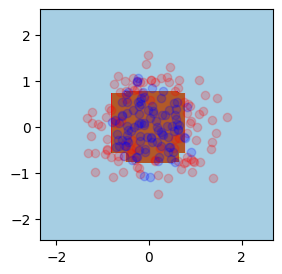

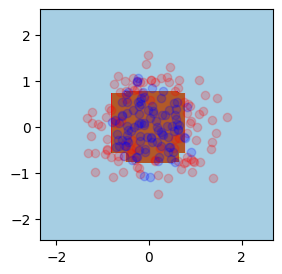

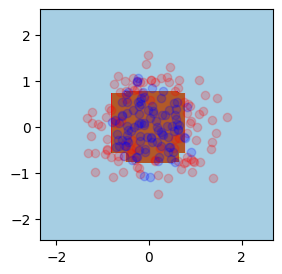

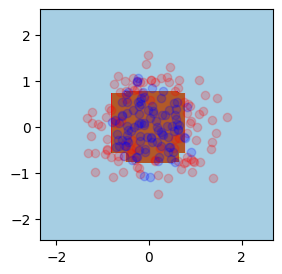

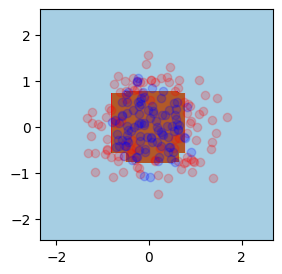

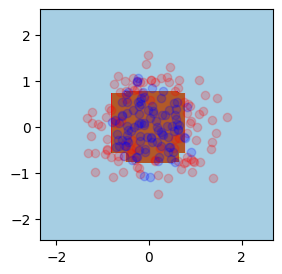

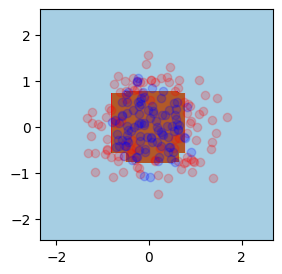

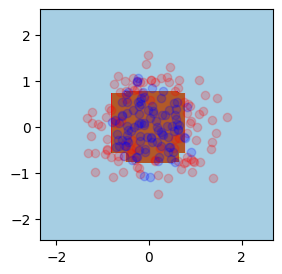

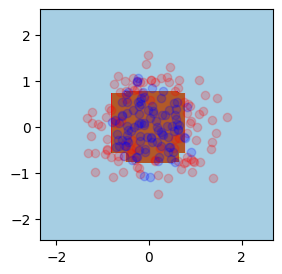

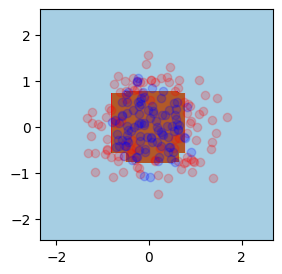

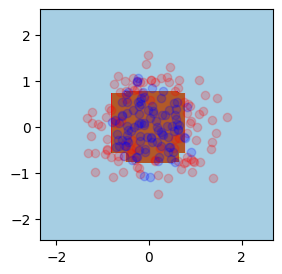

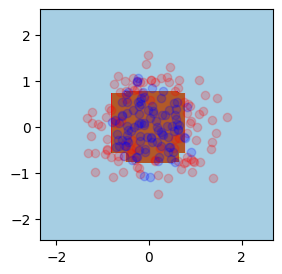

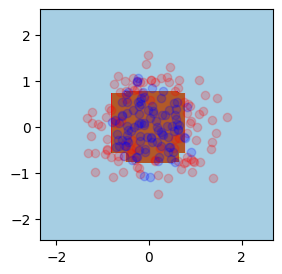

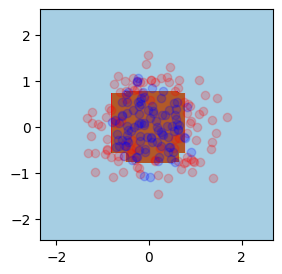

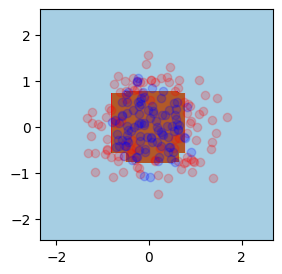

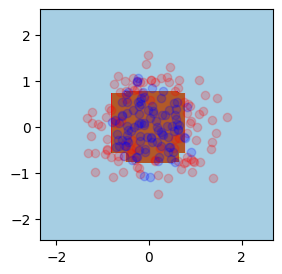

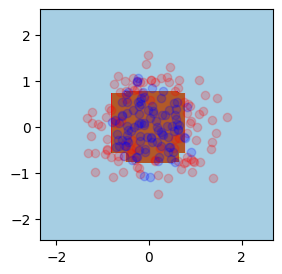

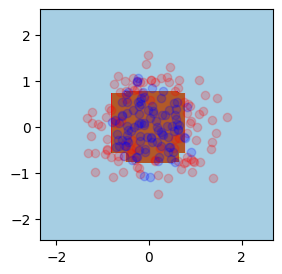

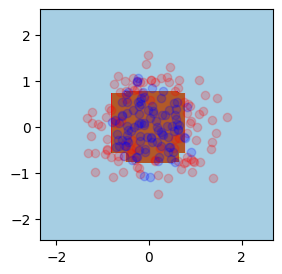

DataSet 50


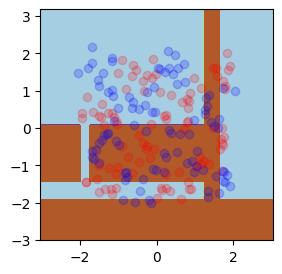

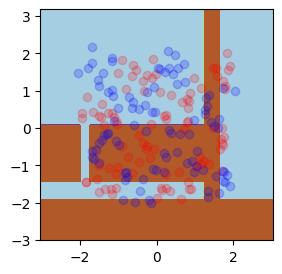

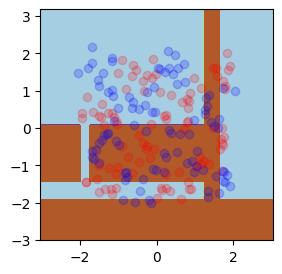

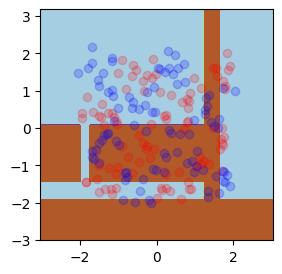

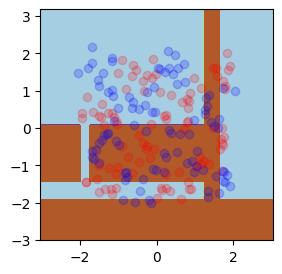

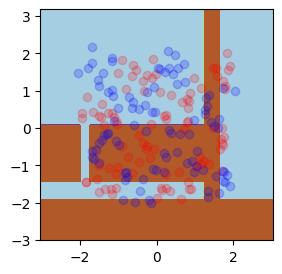

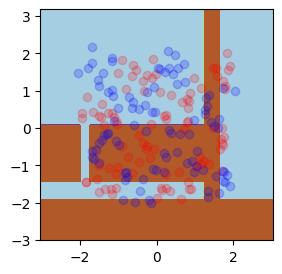

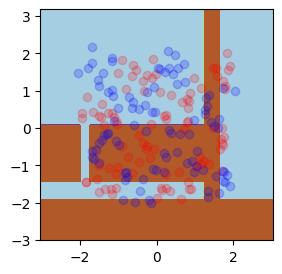

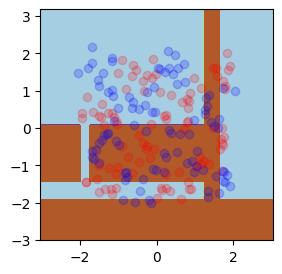

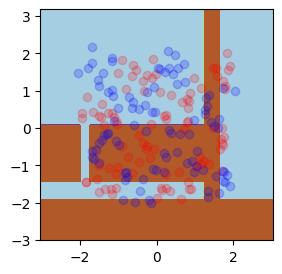

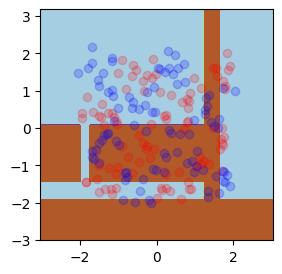

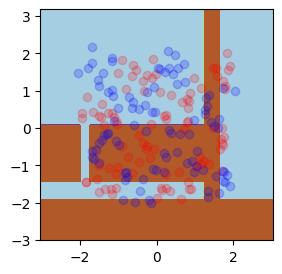

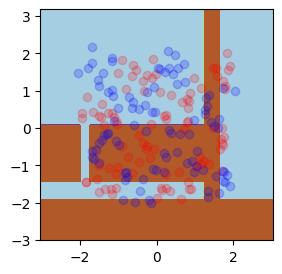

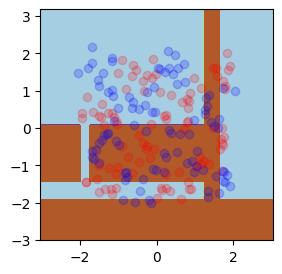

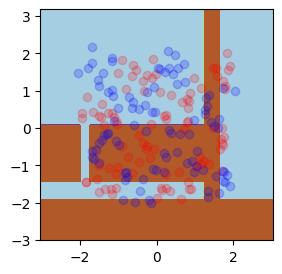

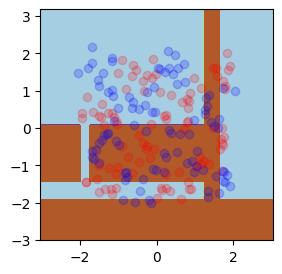

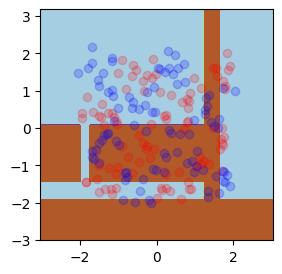

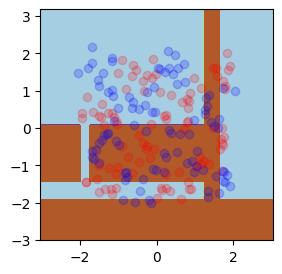

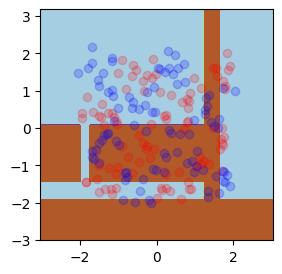

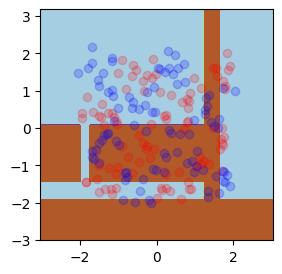

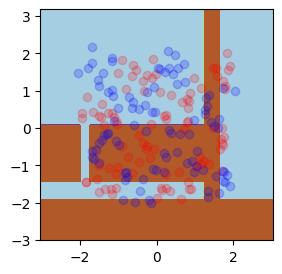

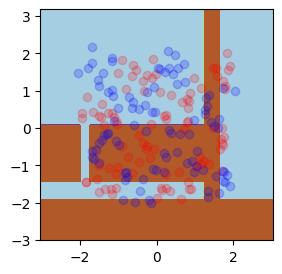

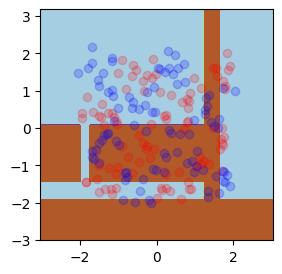

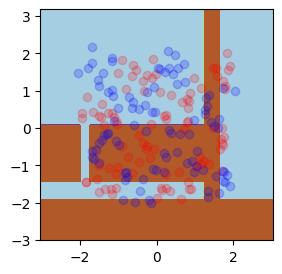

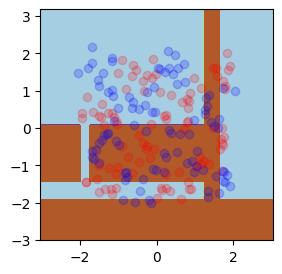

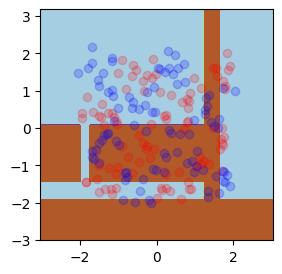

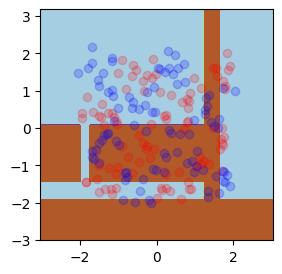

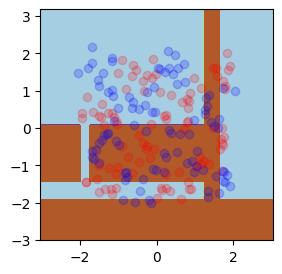

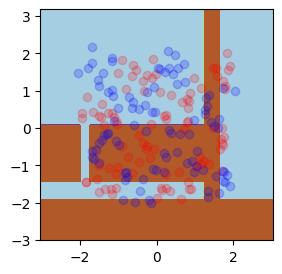

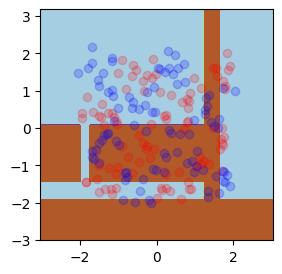

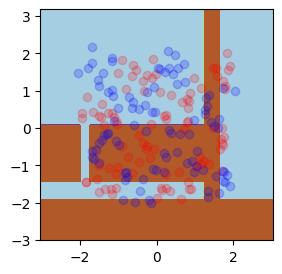

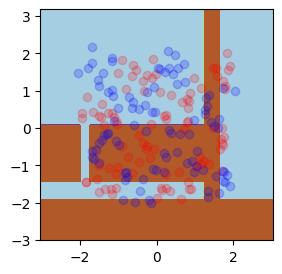

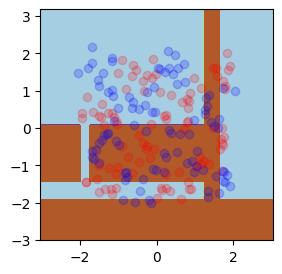

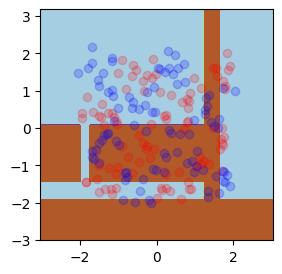

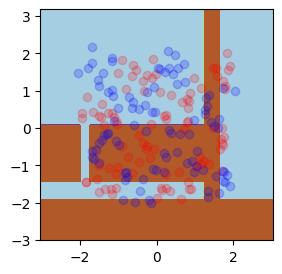

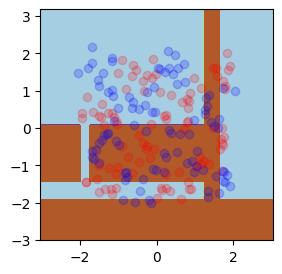

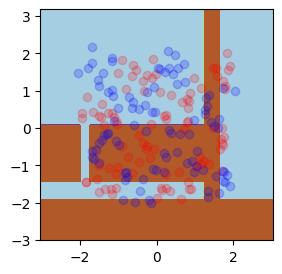

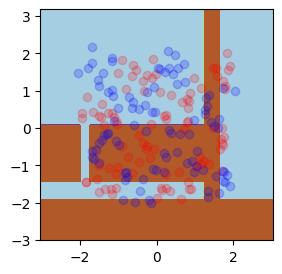

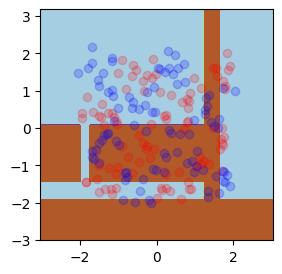

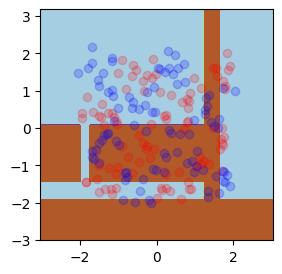

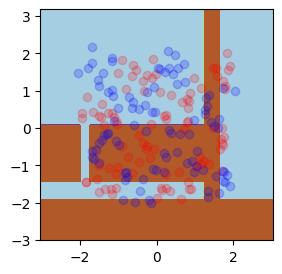

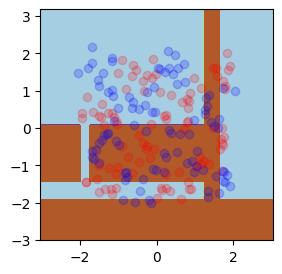

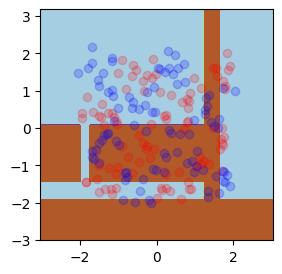

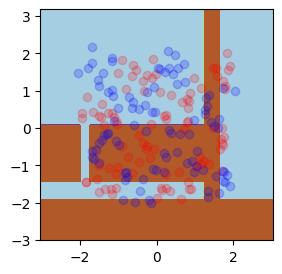

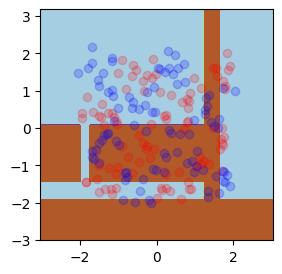

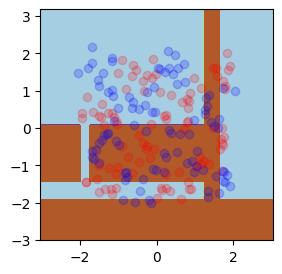

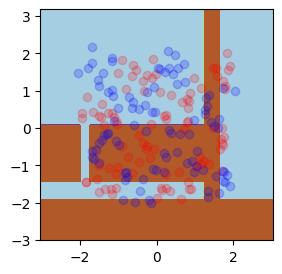

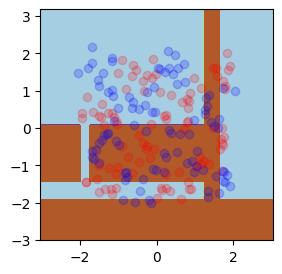

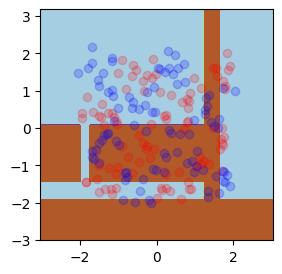

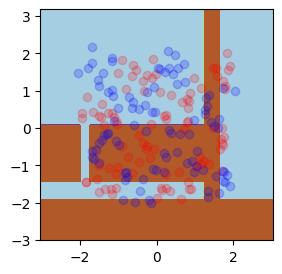

In [39]:
M = 50
K=0

for dataset in datasets:
    K+=1
    print("DataSet "+str(i))
    X, y = dataset
    y = y * 2 - 1  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    ab = AdaBoost()
    ab.fit(X_train, y_train, M=M, X_test=X_test, y_test=y_test)

    for i in range(1, M+1):
        plot_tree(ab, X, y)  

Plot the evolution of the loss and the misclassification rate on the training and test splits over
the 20 iterations.

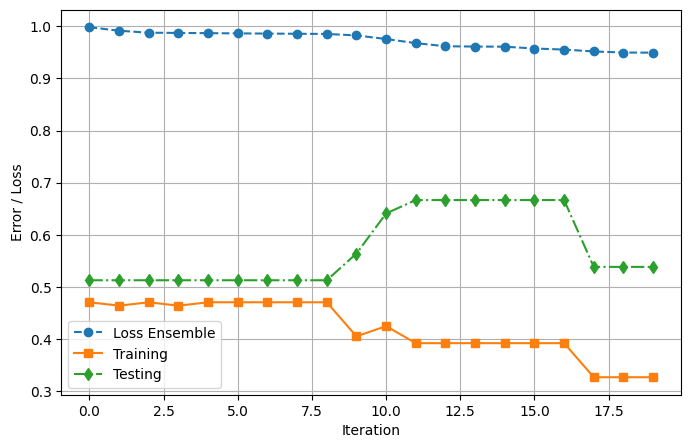

In [41]:
ab = AdaBoost()
ab.fit(X_train, y_train, M = 20, X_test=X_test, y_test=y_test)
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.legend()
plt.grid(True)
plt.show()

# AUC ROC - AUC PR

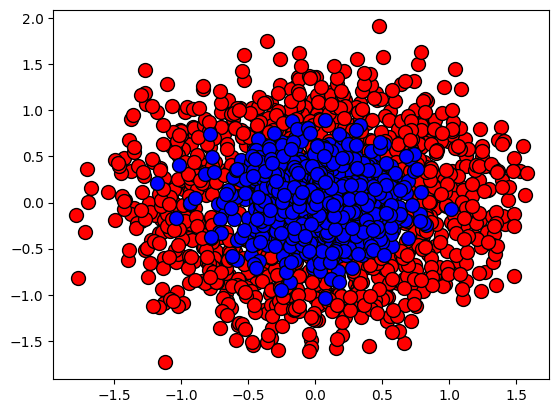

In [42]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ =  roc_curve(y_true, proba)  ### Your code here ### 
    roc_auc =  auc(fpr, tpr)  ### Your code here ### 
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ = precision_recall_curve(y_true, proba)  ### Your code here ### 
    pr_auc = average_precision_score(y_true, proba) ### Your code here ### 
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled
    


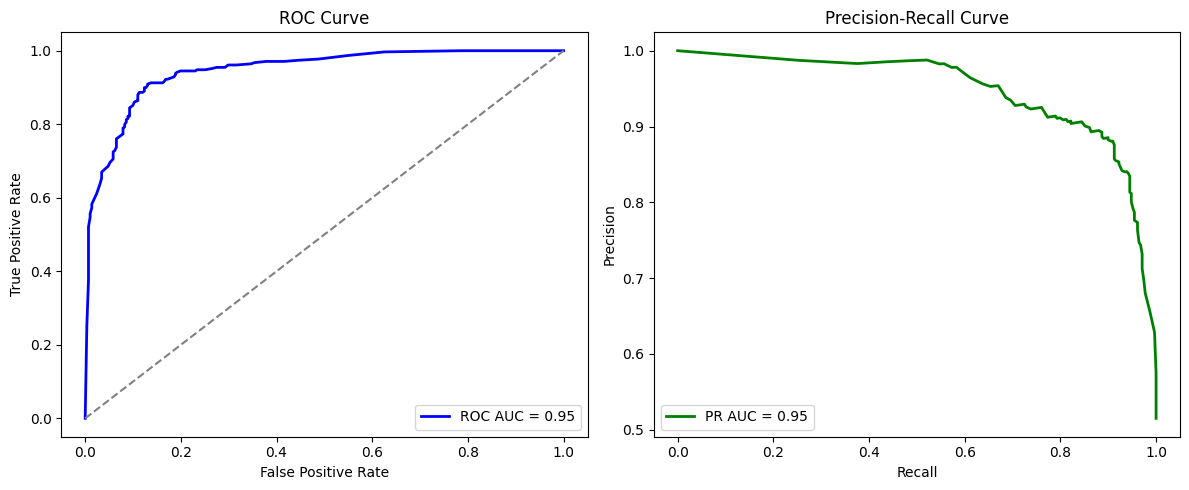

In [27]:
#Question 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]


plot_roc_pr(y_proba, y_test)


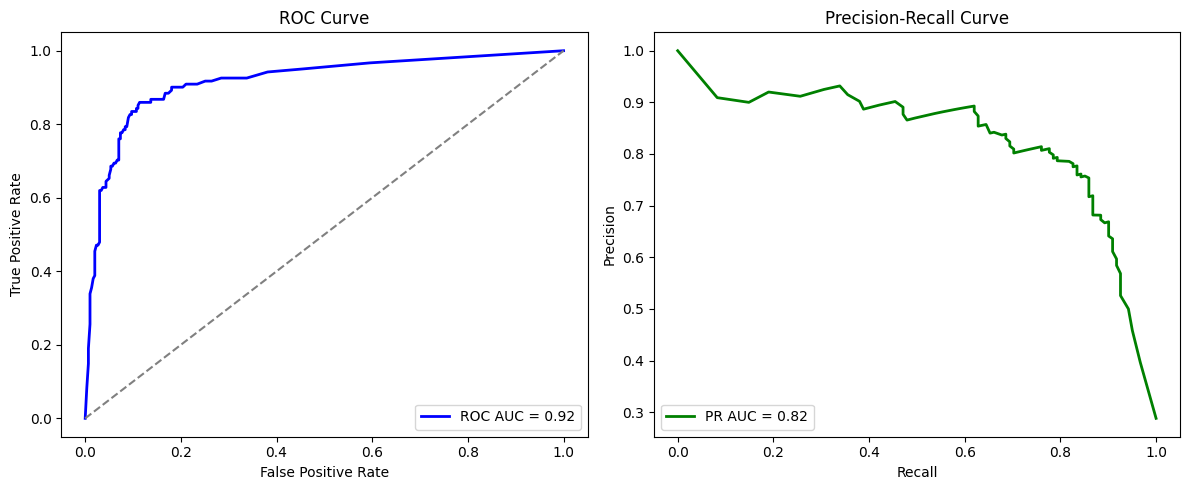

In [28]:
#Question 10 


X_sub, y_sub = subsample_data(X, y, keep_ratio=0.4)

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.3, random_state=0)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_sub, y_train_sub)

y_proba_sub = rf.predict_proba(X_test_sub)[:, 1]


plot_roc_pr(y_proba_sub, y_test_sub)


Sans SubSample

ROC AUC = 0.95 → Très bonne discrimination des classes.
PR AUC = 0.95 → Excellente détection des positifs.

Avec SubSample

ROC AUC = 0.92 → Légère perte de discrimination.
PR AUC = 0.82 → Forte baisse, impact négatif sur la détection des positifs.
Conclusion :

La PR AUC chute fortement → Moins de positifs réduit le rappel et la précision.
La ROC AUC baisse légèrement → Moins affectée par le déséquilibre.
Le sous-échantillonnage des positifs diminue la performance réelle du modèle.

### Question 11

Soit Y le vrai label et Y le label prédit par le modèle:

### 1. Precision
La précision est la probabilité qu’un échantillon soit réellement positif sachant que le modèle l’a prédit positif.  

$$
\text{Précision} = P(Y=1 \mid \hat{Y}=1) = \frac{TP}{TP + FP}
$$


### 2. Recall/True Positive Rate 
Le Recall/TPR, est la probabilité que le modèle prédit positif sachant que l’échantillon est effectivement positif.  

$$
\text{Rappel} = P(\hat{Y}=1 \mid Y=1) = \frac{TP}{TP + FN}
$$


### 3.False Positive Rate 
Le FPR est la probabilité que le modèle prédit positif sachant que l’échantillon est en réalité négatif.  

$$
\text{FPR} = P(\hat{Y}=1 \mid Y=0) = \frac{FP}{FP + TN}
$$


### Question 12

Le F1-score est la moyenne harmonique de la précision et du rappel. La moyenne harmonique de deux valeurs \(a\) et \(b\) est donnée par :

$$
Mh = \frac{2ab}{a + b}
$$

En appliquant cette formule à la précision \(P\) et au rappel \(R\), on obtient :

$$
F_1 = \frac{2 \cdot P \cdot R}{P + R}
$$


